# NV Center Fundamentals: Geometry, Electrons, and Symmetry

## Overview
This notebook covers the fundamental building blocks of understanding NV centers:
- **Step 0**: Defect geometry and electron counting
- **Step 1**: Molecular orbital construction from symmetry

These are the essential foundations that every aspect of the NV center energy diagram builds upon.

## Step 0: Know Your Defect and Electron Count

### The Raw Defect Structure

Before drawing any energy levels, we need to understand what we're working with:

| What you learn | Why it matters |
|---|---|
| Exact atomic layout and crystallographic axis | Sets the symmetry label written next to every electronic term |
| Which atoms bring which valence electrons | Lets you count the total electron pool |
| Net charge of the center | Decides how many electrons stay on the defect vs. lattice |

### Atomic Geometry Inside Diamond

#### Building the NV Center Structure

1. **Start from pristine diamond**: $sp^3$-bonded face-centered-cubic (FCC) lattice
2. **Create the defect pair**:
   - Remove one carbon atom → vacancy with three neighboring carbons with dangling $sp^3$ orbitals
   - Substitute adjacent carbon with nitrogen atom (N)
   - N keeps three tetrahedral bonds, fourth points toward vacancy

#### Crystal Structure Visualization

The following interactive 3D visualization shows the atomic structure of the NV center in diamond:

In [26]:
# Import visualization utilities
import sys
sys.path.append('code')  # Add the code directory to path
from nv_visualization_utils import create_nv_center_demo, create_nv_center_full

from ipywidgets import interactive, Dropdown, VBox, Layout

fig = create_nv_center_demo()

# Display the plot
fig.show()

Created diamond lattice with 64 atoms
Found 86 bonds between atoms
Created NV center: Nitrogen at index 56, Vacancy at index 57


## Interaction Tips

- **Rotate**: Click and drag to rotate the model
- **Zoom**: Use the mouse wheel or pinch gesture
- **Pan**: Hold Shift while dragging
- **Reset view**: Double-click anywhere in the visualization
- **Hover**: Move your cursor over atoms to see their type
- **Camera Controls**: Use the camera controls in the top-right corner for predefined views
- **Save as Image**: Use the camera icon in the toolbar to save the current view as an image

You can also switch to a full-screen mode using the expand icon in the top-right of the visualization.

#### Symmetry Analysis

Now that we can visualize the structure, let's analyze its symmetry properties:

3. **Identify the symmetry**: The N–V pair plus three equivalent carbons form a trigonal pyramid
   - **Rotation**: 120° about the N→V line
   - **Mirrors**: three $\sigma$ planes through that axis
   - **Point group**: $C_{3v}$

#### Interactive Symmetry Explorer

The following tool allows you to explore the symmetry operations of the NV center:

In [ ]:
# Import the symmetry explorer module
import sys
sys.path.append('code')  # Add the code directory to path
from nv_center_symmetry_explorer_fundamentals import create_symmetry_explorer

# Create and display the interactive symmetry explorer
symmetry_explorer = create_symmetry_explorer()

interactive(children=(Dropdown(description='Symmetry Op:', options=('Identity', 'C3 (120°)', 'C3² (240°)', 'σv…

✅ Interactive NV center symmetry explorer is ready!

Use the dropdown menu above to explore different symmetry operations!

The interactive Plotly visualization allows you to:
- Rotate by clicking and dragging
- Zoom with the mouse wheel
- Pan by holding Shift while dragging
- Reset the view by double-clicking


### Counting Electrons: The Famous "Six"

#### Why Six Electrons Matter

This is crucial - if you can't trace these six electrons, nothing else will make sense:

#### Electron Inventory

1. **Nitrogen brings 5 valence electrons**
   - Three form $\sigma$-bonds to surrounding carbons
   - **2 remain** in lone-pair-like orbital toward vacancy

2. **Three vacancy carbons each contribute 1 dangling-bond electron → 3 more**

3. **Extra charge in NV$^-$**
   - Additional electron captured from lattice
   - Total: 5 + 3 + 1 = 9 electrons around the site
   - But 3 are tied up in $\sigma$ bonds with nitrogen
   - **Only 6 electrons in gap orbitals that matter**

#### The Six-Electron Model Foundation

This "six-electron model" is the foundation of all modern NV$^-$ descriptions. These six electrons will occupy the molecular orbitals we derive in the next section.

## Step 1: Molecular Orbitals from Symmetry

### Goal
Starting from atomic dangling bonds, systematically obtain the three independent single-electron orbitals that will hold our six electrons.

### The $C_{3v}$ Character Table

| $C_{3v}$ | E | $2C_3$ | $3\sigma_v$ | Typical basis |
|----------|---|--------|-------------|---------------|
| $A_1$    | 1 | 1      | 1           | z, $x^2+y^2$  |
| $A_2$    | 1 | 1      | -1          | $R_z$         |
| E        | 2 | -1     | 0           | $(x,y)$, $(R_x,R_y)$ |

### Starting Basis: Four Dangling-Bond Orbitals

| Orbital | Atom | Direction |
|---------|------|----------|
| n | N lone-pair $sp^3$ | along +z (toward vacancy) |
| $c_1, c_2, c_3$ | $sp^3$ of each C | tilted ~109° toward vacancy |

In [28]:
# Group theory analysis for orbital symmetry
import pandas as pd
from IPython.display import display, Markdown, Math

# C3v character table
char_table = pd.DataFrame({
    'Irrep': ['A₁', 'A₂', 'E'],
    'E': [1, 1, 2],
    '2C₃': [1, 1, -1],
    '3σᵥ': [1, -1, 0]
})

display(Markdown("### C₃ᵥ Character Table:"))
display(char_table)

# Calculate the reducible representation for 4 dangling bonds
display(Markdown("\n### Reducible representation analysis:"))
display(Markdown("Four dangling-bond orbitals under C₃ᵥ operations:"))

# Count unchanged orbitals under each operation
operations = ['E', 'C₃', 'σᵥ']
unchanged = [4, 1, 2]  # E: all 4, C₃: only N, σᵥ: N + 1 C in plane
multiplicities = [1, 2, 3]  # number of operations in each class

reducible_rep = pd.DataFrame({
    'Operation': operations,
    'Unchanged orbitals': unchanged,
    'Multiplicity': multiplicities,
    'Character χ(Γ)': unchanged
})

display(reducible_rep)

# Decompose into irreducible representations
h = 6  # order of group
n_A1 = (1*4*1 + 1*1*2 + 1*2*3) / h
n_A2 = (1*4*1 + 1*1*2 + (-1)*2*3) / h
n_E = (2*4*1 + (-1)*1*2 + 0*2*3) / h

display(Markdown(f"\n### Decomposition:"))
display(Math(f"\\Gamma = {n_A1:.0f}A_1 \\oplus {n_A2:.0f}A_2 \\oplus {n_E:.0f}E"))
display(Markdown(f"**Result**: $2A_1 \\oplus E$ ($A_2$ does not appear)"))

display(Markdown("\n### This gives us exactly three molecular orbitals:"))
display(Markdown("- $a_1(1)$: deep, N-dominated"))
display(Markdown("- $a_1(2)$: gap state, more C-like")) 
display(Markdown("- $e$ (doubly degenerate): pure C character"))

### C₃ᵥ Character Table:

,Irrep,E,2C₃,3σᵥ
0,A₁,1,1,1
1,A₂,1,1,-1
2,E,2,-1,0



### Reducible representation analysis:

Four dangling-bond orbitals under C₃ᵥ operations:

,Operation,Unchanged orbitals,Multiplicity,Character χ(Γ)
0,E,4,1,4
1,C₃,1,2,1
2,σᵥ,2,3,2



### Decomposition:

<IPython.core.display.Math object>

**Result**: $2A_1 \oplus E$ ($A_2$ does not appear)


### This gives us exactly three molecular orbitals:

- $a_1(1)$: deep, N-dominated

- $a_1(2)$: gap state, more C-like

- $e$ (doubly degenerate): pure C character

### Symmetry-Adapted Linear Combinations (SALCs)

The actual molecular orbitals are formed by taking linear combinations of the atomic orbitals:

| SALC | Mathematical form | Physical picture |
|------|------------------|------------------|
| **$a_1(1)$** | $n + \frac{1}{\sqrt{3}}(c_1+c_2+c_3)$ | In-phase sum; biggest weight on N → **deep core-like** |
| **$a_1(2)$** | $-\frac{1}{\sqrt{3}}n + (c_1+c_2+c_3)$ | Antibonding wrt N; node between N and C → **gap state** |
| **$e_x$** | $c_1 - \frac{1}{2}(c_2+c_3)$ | Pure carbon character |
| **$e_y$** | $\frac{\sqrt{3}}{2}(c_2-c_3)$ | Pure carbon character |

### Energy Ordering

Because nitrogen is more electronegative than carbon:
- **$a_1(1)$** (largest N coefficient) drops deepest (~1-2 eV below valence band)
- **$a_1(2)$** sits higher in the band gap  
- **$e$** orbitals (no N contribution) just above $a_1(2)$, still in gap
- DFT calculations: e-to-$a_1(2)$ splitting ~0.2-0.3 eV

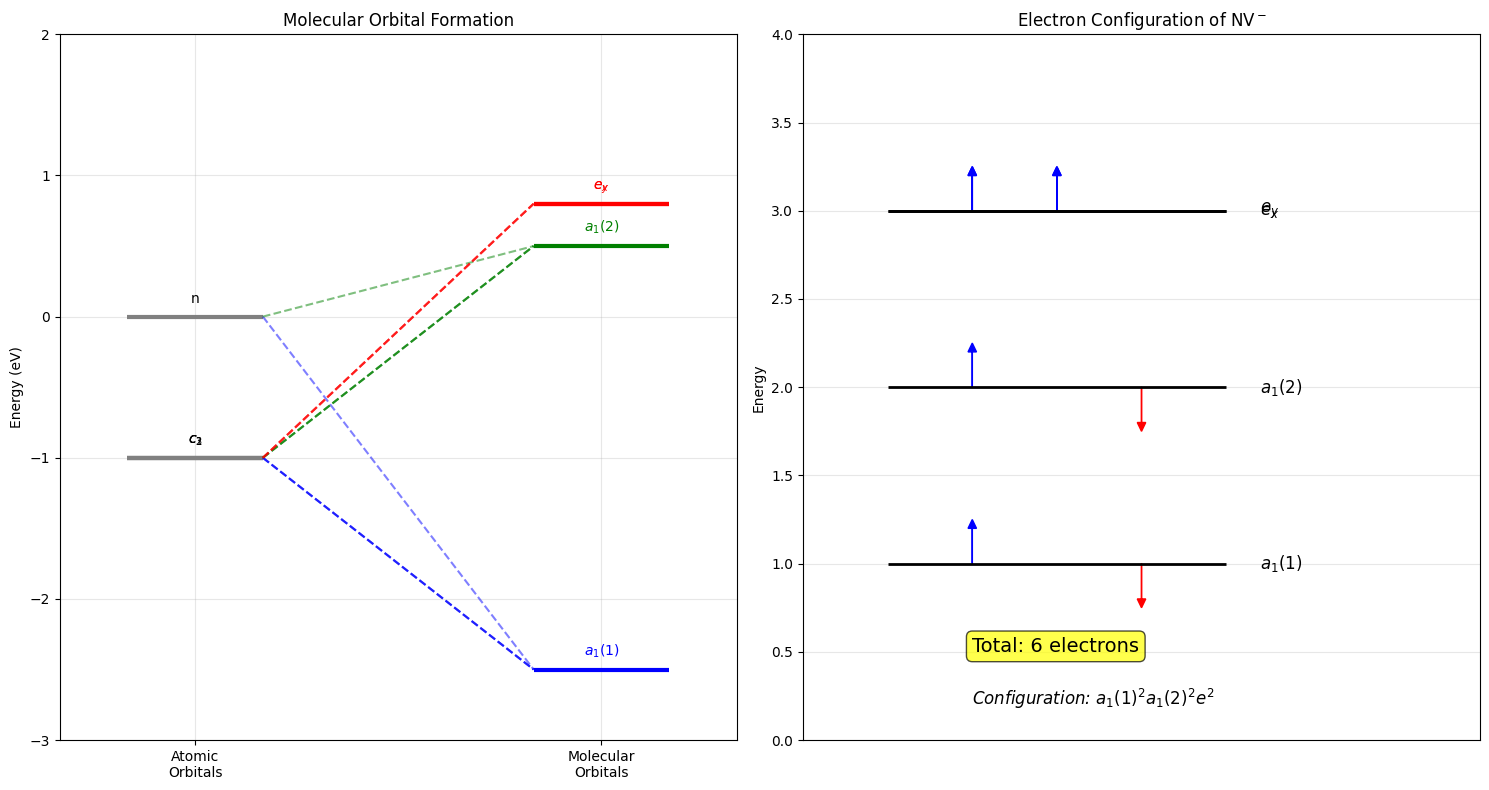


### Key Results from Step 1:

- Four dangling bonds → $2A_1 \oplus E$ molecular orbitals

- $a_1(1)$: deep, N-dominated (−2.5 eV)

- $a_1(2)$: gap state (+0.5 eV)

- $e$: doubly degenerate, C-dominated (+0.8 eV)

- **Ground configuration**: $a_1(1)^2 a_1(2)^2 e^2$

In [29]:
# Visualize the molecular orbital energy levels
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Left plot: Orbital formation scheme
# Atomic orbitals on left, molecular orbitals on right
atomic_levels = [-1, -1, -1, 0]  # c1, c2, c3, n (relative energies)
mo_levels = [-2.5, 0.5, 0.8, 0.8]  # a1(1), a1(2), ex, ey
mo_labels = ['$a_1(1)$', '$a_1(2)$', '$e_x$', '$e_y$']
mo_colors = ['blue', 'green', 'red', 'red']

# Draw atomic orbitals
for i, level in enumerate(atomic_levels):
    ax1.hlines(level, 0, 1, colors='gray', linewidth=3)
    if i < 3:
        ax1.text(0.5, level + 0.1, f'$c_{i+1}$', ha='center', fontsize=10)
    else:
        ax1.text(0.5, level + 0.1, 'n', ha='center', fontsize=10)

# Draw molecular orbitals
for i, (level, label, color) in enumerate(zip(mo_levels, mo_labels, mo_colors)):
    ax1.hlines(level, 3, 4, colors=color, linewidth=3)
    ax1.text(3.5, level + 0.1, label, ha='center', fontsize=10, color=color)

# Draw mixing lines
# a1(1): all orbitals contribute
for atomic_level in atomic_levels:
    ax1.plot([1, 3], [atomic_level, mo_levels[0]], 'b--', alpha=0.5)

# a1(2): all orbitals contribute (different phase)
for atomic_level in atomic_levels:
    ax1.plot([1, 3], [atomic_level, mo_levels[1]], 'g--', alpha=0.5)

# e orbitals: only carbon contributions
for i in range(3):
    ax1.plot([1, 3], [atomic_levels[i], mo_levels[2]], 'r--', alpha=0.3)
    ax1.plot([1, 3], [atomic_levels[i], mo_levels[3]], 'r--', alpha=0.3)

ax1.set_xlim(-0.5, 4.5)
ax1.set_ylim(-3, 2)
ax1.set_ylabel('Energy (eV)')
ax1.set_title('Molecular Orbital Formation')
ax1.set_xticks([0.5, 3.5])
ax1.set_xticklabels(['Atomic\nOrbitals', 'Molecular\nOrbitals'])
ax1.grid(True, alpha=0.3)

# Right plot: Electron filling
# Show how 6 electrons fill the MOs
energy_levels = [0.8, 0.8, 0.5, -2.5]  # ex, ey, a1(2), a1(1)
level_labels = ['$e_y$', '$e_x$', '$a_1(2)$', '$a_1(1)$']
degeneracies = [1, 1, 1, 1]
occupations = [1, 1, 2, 2]  # electrons in each orbital

y_positions = [3, 3, 2, 1]  # vertical positions for drawing

for i, (energy, label, occ, y_pos) in enumerate(zip(energy_levels, level_labels, occupations, y_positions)):
    # Draw orbital line
    ax2.hlines(y_pos, 0, 2, colors='black', linewidth=2)
    ax2.text(2.2, y_pos, label, va='center', fontsize=12)
    
    # Draw electrons as arrows
    if occ >= 1:
        ax2.arrow(0.5, y_pos, 0, 0.2, head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    if occ == 2:
        ax2.arrow(1.5, y_pos, 0, -0.2, head_width=0.05, head_length=0.05, fc='red', ec='red')
    elif occ == 1 and i < 2:  # e orbitals with single electrons
        ax2.arrow(1.0, y_pos, 0, 0.2, head_width=0.05, head_length=0.05, fc='blue', ec='blue')

# Add electron count
ax2.text(0.5, 0.5, 'Total: 6 electrons', fontsize=14, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
ax2.text(0.5, 0.2, 'Configuration: $a_1(1)^2 a_1(2)^2 e^2$', fontsize=12, style='italic')

ax2.set_xlim(-0.5, 3.5)
ax2.set_ylim(0, 4)
ax2.set_ylabel('Energy')
ax2.set_title('Electron Configuration of NV$^-$')
ax2.set_xticks([])
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Use proper LaTeX rendering for output
from IPython.display import display, Markdown, Math

display(Markdown("\n### Key Results from Step 1:"))
display(Markdown("- Four dangling bonds → $2A_1 \\oplus E$ molecular orbitals"))
display(Markdown("- $a_1(1)$: deep, N-dominated (−2.5 eV)"))
display(Markdown("- $a_1(2)$: gap state (+0.5 eV)"))
display(Markdown("- $e$: doubly degenerate, C-dominated (+0.8 eV)"))
display(Markdown("- **Ground configuration**: $a_1(1)^2 a_1(2)^2 e^2$"))

## Summary and Checkpoint

### What we have established:

1. **Geometry**: NV$^-$ has $C_{3v}$ symmetry with the z-axis along N→V
2. **Electrons**: Exactly 6 electrons occupy the defect gap orbitals
3. **Molecular orbitals**: Three sets from group theory:
   - $a_1(1)$: deep, doubly occupied
   - $a_1(2)$: gap state, doubly occupied  
   - $e$: doubly degenerate, singly occupied (2 electrons total)
4. **Ground configuration**: $a_1(1)^2 a_1(2)^2 e^2$

### Critical understanding check:

✅ Can you trace the six electrons back to their atomic origins?

✅ Do you understand why $C_{3v}$ symmetry gives $2A_1 \oplus E$ orbitals?

✅ Can you explain why $a_1(1)$ is deepest and $e$ is highest?

**Next**: In the next notebook, we'll see how the open $e^2$ shell leads to the famous $^3A_2$ ground state triplet through application of Hund's rules and group theory.

## References and Sources

### Key Scientific Literature

1. **Doherty, M. W. et al.** (2013). *The nitrogen-vacancy colour centre in diamond*. Physics Reports, 528(1), 1-45.
   - Comprehensive review of NV center physics and applications
   - [DOI: 10.1016/j.physrep.2013.02.001](https://doi.org/10.1016/j.physrep.2013.02.001)

2. **Maze, J. R. et al.** (2008). *Properties of nitrogen-vacancy centers in diamond: the group theoretic approach*. New Journal of Physics, 10(4), 045004.
   - Detailed group theory analysis of NV center electronic structure
   - [DOI: 10.1088/1367-2630/10/4/045004](https://doi.org/10.1088/1367-2630/10/4/045004)

3. **Gali, A.** (2019). *Recent advances in the ab initio theory of solid defects*. npj Computational Materials, 5(1), 1-12.
   - Modern computational approaches to defect physics
   - [DOI: 10.1038/s41524-019-0147-y](https://doi.org/10.1038/s41524-019-0147-y)

4. **Manson, N. B. & Harrison, J. P.** (2005). *Photo-ionization of the nitrogen-vacancy center in diamond*. Diamond and Related Materials, 14(10), 1705-1710.
   - Experimental characterization of NV center energy levels
   - [DOI: 10.1016/j.diamond.2005.06.027](https://doi.org/10.1016/j.diamond.2005.06.027)

### Theoretical Background

5. **Tinkham, M.** (1964). *Group Theory and Quantum Mechanics*. McGraw-Hill.
   - Classical reference for group theory applications in solid state physics

6. **Cotton, F. A.** (1990). *Chemical Applications of Group Theory*. 3rd Edition, Wiley.
   - Molecular orbital theory and symmetry-adapted linear combinations

7. **Atkins, P. W. & Friedman, R. S.** (2010). *Molecular Quantum Mechanics*. 5th Edition, Oxford University Press.
   - Term symbols and many-electron configurations

### Computational Resources

8. **Alkauskas, A. et al.** (2014). *First-principles theory of the luminescence lineshape for the triplet transition in diamond NV centres*. New Journal of Physics, 16(7), 073026.
   - Ab initio calculations of NV center properties
   - [DOI: 10.1088/1367-2630/16/7/073026](https://doi.org/10.1088/1367-2630/16/7/073026)

9. **Delaney, P. et al.** (2002). *Identification of the NV center in diamond through its response to electric fields*. Applied Physics Letters, 84(22), 4649-4651.
   - DFT calculations and experimental validation
   - [DOI: 10.1063/1.1759370](https://doi.org/10.1063/1.1759370)

### Educational Resources

10. **Wrachtrup, J. & Jelezko, F.** (2006). *Processing quantum information in diamond*. Journal of Physics: Condensed Matter, 18(21), S807-S824.
    - Pedagogical introduction to NV center physics
    - [DOI: 10.1088/0953-8984/18/21/S08](https://doi.org/10.1088/0953-8984/18/21/S08)

### Online Resources

- **Harvard Quantum Optics Group**: [https://www.physics.harvard.edu/research/quantum-optics](https://www.physics.harvard.edu/research/quantum-optics)
- **MIT Center for Quantum Engineering**: [https://cqe.mit.edu/](https://cqe.mit.edu/)
- **NIST Diamond NV Center Database**: [https://www.nist.gov/pml/sensor-science/quantum-sensors](https://www.nist.gov/pml/sensor-science/quantum-sensors)

### Acknowledgments

This notebook synthesizes knowledge from the broader NV center research community. Special recognition goes to the pioneering work of:
- Neil Manson and John Harrison (Australian National University)
- Jörg Wrachtrup (University of Stuttgart)  
- Mikhail Lukin (Harvard University)
- Ronald Walsworth (formerly Harvard, now University of Maryland)
- Adam Gali (Wigner Research Centre for Physics)